# Introduction to Matplotlib

This notebook provides an introduction to the `matplotlib` package. The content borrows heavily from the book *Data Science Handbook*, which was written by Jake VanderPlas and is available at https://jakevdp.github.io/PythonDataScienceHandbook/ (accessed 12/17/2019). From https://en.wikipedia.org/wiki/Matplotlib (accessed 12/26/2018):
> `matplotlib` is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.

The following table of contents lists the topics discussed in this notebook. Clicking on any topic will advance the notebook to the associated area.


# Table of Contents
<a id="Table_of_Contents"> </a>

1. [Preliminaries](#preliminaries)<br>
2. [Simple Line Plots](#simple_line_plots)<br>
3. [Scatter Plots](#scatter_plots)<br>
4. [Histograms](#histograms)<br>
5. [Contour Plots](#contour_plots)<br>
    
#### Disclaimer

This notebook provides a very high-level look at the `matplotlib`, not a comprehensive overview. Also, it is important to realize that the Python language and the available packages will continue to evolve. That being said, the objects, functions, and methods described in this notebook may one day change. If changes occur, areas of this notebook that use deprecated features may cease to work and will need to be revised or omitted.

[Back to Table of Contents](#Table_of_Contents)<br>

## Preliminaries
<a id="preliminaries"> </a>

`matplotlib` is a large package that offers a lot of features for plotting. However, the large number of features can result in a rather slow learning curve. A particularly confusing aspect of `matplotlib` when just starting to work with the package is that it provides dual interfaces. In particular, it provides 1) an interface that was designed to mimic the mathematical programming software *MATLAB* and 2) object-oriented interface. In this notebook, we will be using the object-oriented interface. Moreover, we will utilie a consistent framework for plotting in an effort to provide a relatively easy model for how to work with the package.

![axfig](images/matplotlib_ax_fig.png)

The Figure is the top-level container that acts as the window or page on which everything is drawn. It can contain multiple independent figures, multiple Axes, a subtitle (which is a centered title for the figure), a legend, a color bar, etc.

The Axes is the area on which we plot our data and any labels/ticks associated with it. Each Axes has an X-Axis and a Y-Axis (like in the image above). (source: https://heartbeat.fritz.ai/)

## Simple Line Plots
<a id="simple_line_plots"> </a>

In this section, we will begin our introduction to `matplotlib` by demonstrating the construction of a simple line plot. The following code block imports `numpy` and uses the packacge to generate an array that includes values $[-10,~ -9.8,~ -9.6,~ \ldots,~ 9.6,~ 9.8,~ 10]$. 

[Back to Table of Contents](#Table_of_Contents)<br>

In [1]:
import numpy as np


x = np.linspace(-10, 10, 101)

In the following code block, we import a particular module of the `matplotlib` package. Specifically, we import the `pyplot` module and denote that we will be using the alias `plt` to refer to the module. This alias is a standard convention.

[Back to Table of Contents](#Table_of_Contents)<br>

In [2]:
import matplotlib.pyplot as plt

As mentioned earlier, we will be using `matplotlib`'s object-oriented interfaces. Essentially, an object-oriented programming approach aims to model programming constructs as a set of objects that can be controlled and manipulated in a modular manner. Instead of going into detail on what makes the object-oriented approach different, we will simply demonstrate it using a consistent framework that allows a use to construct a multi-plot figure.

In [3]:
import seaborn as sns
tips = sns.load_dataset("tips")

In [4]:
# Display the tips dataframe
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Sum the tips by day
tips_sum = tips.groupby('day').sum().reset_index()

In [6]:
tips_sum.head(10)

,day,total_bill,tip,size
0,Thur,1096.33,171.83,152
1,Fri,325.88,51.96,40
2,Sat,1778.40,260.40,219
3,Sun,1627.16,247.39,216


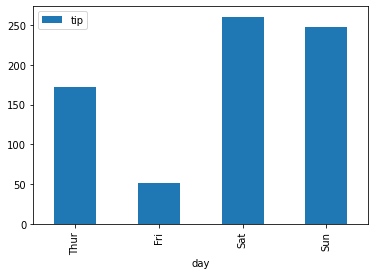

In [7]:
tips_sum.plot(kind='bar',x='day',y='tip')
plt.show()

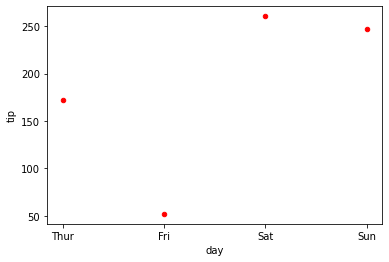

In [8]:
# Change the plot type to scatter and color the indicators red
tips_sum.plot(kind='scatter',x='day',y='tip',color='red')
plt.show()

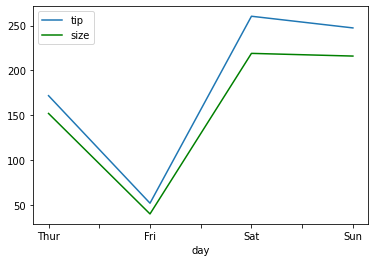

In [9]:
# Plot multiple columns

# First, get the current axis, so we can plot them together
ax = plt.gca()

tips_sum.plot(kind='line',x='day',y='tip', ax=ax)
tips_sum.plot(kind='line',x='day',y='size', ax=ax, color='green')
plt.show()

In [10]:
plt.savefig('size_tip.png')

<Figure size 432x288 with 0 Axes>

The following code block use the `subplots()` method of the `matplotlib.pyplot` module to create an empty plotting region that contains a single subplot. **Note that the call to the `subplots()` method returns a tuple that we store in the variables `fig` and `ax`. The `fig` variable allows us to access the *figure object*. The `ax` variable store a tuple that we will use to modify individual suplots that compose to the figure object. Calling `matplotlib.pyplot`'s `show()` method renders the current figure.**

[Back to Table of Contents](#Table_of_Contents)<br>

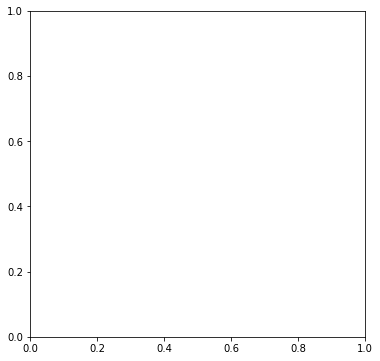

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))

plt.show()

Previously, we simply created and plotted an empty figure object. Inserting additional instructions between the figure creation and the call to `plt.show()` allows us to create visulaizations that range from simple to very complex. In the following code blocks, we will build our simple line plot slowly by adding one feature at a time. The next code block adds a grid to our `ax` object. In this case, we have defined a figure object that is composed by a single subplot. Thus, we can use the `ax` object directly. We will see later that when the figure object is composed of multiple subplots, we can use `numpy`-like indexing to make changes to specifiec subplots.

[Back to Table of Contents](#Table_of_Contents)<br>

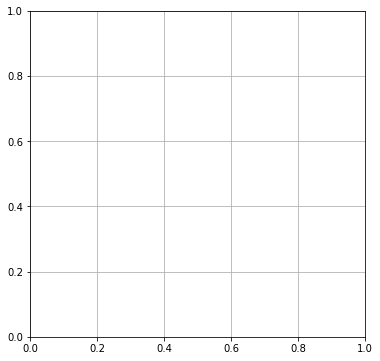

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))

ax.grid(True)

plt.show()

Next, we use the `plot()` method for our `ax` object to plot the value of the sine function for each value stored in our `x` array object.

[Back to Table of Contents](#Table_of_Contents)<br>

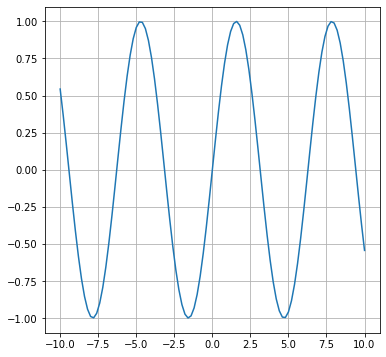

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))

ax.grid(True)
ax.plot(x, np.sin(x))

plt.show()

Next, we use the `set_title()`, `set_ylabel`, and `set_xlabel` methods of our `ax` object to define labels for the axes and a title for the subplot.

[Back to Table of Contents](#Table_of_Contents)<br>

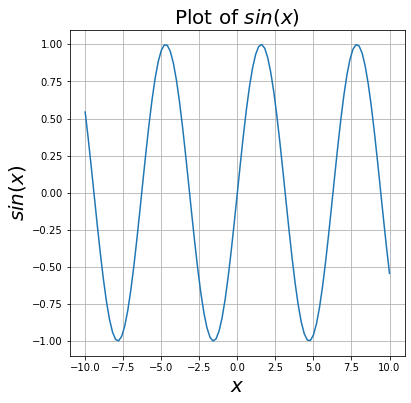

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))

ax.grid(True)
ax.plot(x, np.sin(x))
ax.set_title(r'Plot of $sin(x)$', fontsize = 20)
ax.set_ylabel(r'$sin(x)$', fontsize = 20)
ax.set_xlabel(r'$x$', fontsize = 20)

plt.show()

Let's suppose that we would like to plot multiple trigonometric functions. We can do this by modifying the previous code so that the figure object is composed of multiple subplots. The following code block shows how we can modfiy the previous code to include two subplots, one for the sine function and another for the cosine function. The first two arguments to the `subplots()` method define the number of rows and columns in the figure, respectively. Thus, our figure object includes one row of two subplots. We may access each of the subplots using syntax similar to that which we would use to access the elements of a one-dimensional Numpy array.

[Back to Table of Contents](#Table_of_Contents)<br>

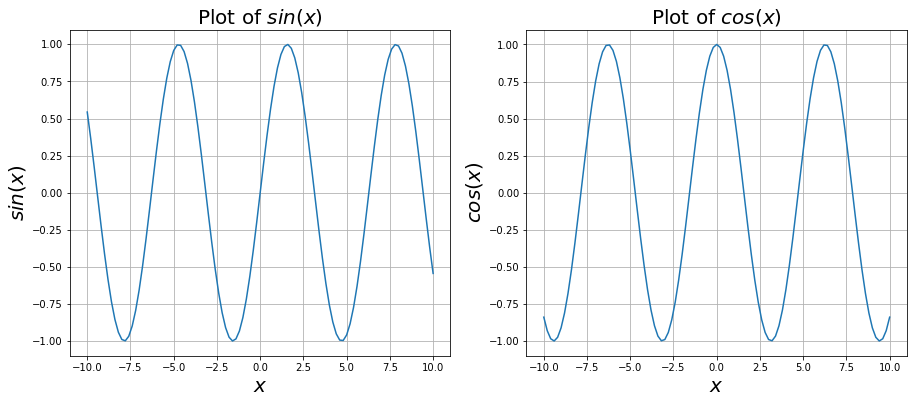

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

ax[0].grid(True)
ax[0].plot(x, np.sin(x))
ax[0].set_title(r'Plot of $sin(x)$', fontsize = 20)
ax[0].set_ylabel(r'$sin(x)$', fontsize = 20)
ax[0].set_xlabel(r'$x$', fontsize = 20)

ax[1].grid(True)
ax[1].plot(x, np.cos(x))
ax[1].set_title(r'Plot of $cos(x)$', fontsize = 20)
ax[1].set_ylabel(r'$cos(x)$', fontsize = 20)
ax[1].set_xlabel(r'$x$', fontsize = 20)
plt.show()

Let's now consider the case where we want to add another subplot for the tangent function. The following code block shows how we can add such a plot as a subplot on a new row in our figure object. Note that now we have defined a figure object with two rows and two columns. Thus, when accessing individual subplots, we use syntax similar to that which we would use to access elements in a two-dimensional Numpy array object.

[Back to Table of Contents](#Table_of_Contents)<br>

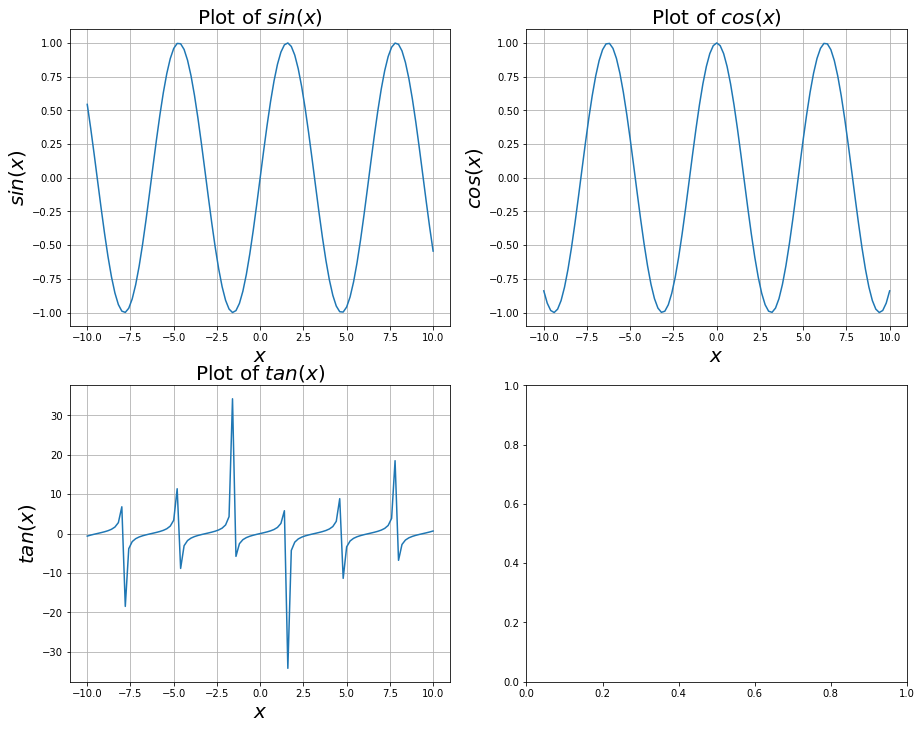

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (15, 12))

ax[0, 0].grid(True)
ax[0, 0].plot(x, np.sin(x))
ax[0, 0].set_title(r'Plot of $sin(x)$', fontsize = 20)
ax[0, 0].set_ylabel(r'$sin(x)$', fontsize = 20)
ax[0, 0].set_xlabel(r'$x$', fontsize = 20)

ax[0, 1].grid(True)
ax[0, 1].plot(x, np.cos(x))
ax[0, 1].set_title(r'Plot of $cos(x)$', fontsize = 20)
ax[0, 1].set_ylabel(r'$cos(x)$', fontsize = 20)
ax[0, 1].set_xlabel(r'$x$', fontsize = 20)

ax[1, 0].grid(True)
ax[1, 0].plot(x, np.tan(x))
ax[1, 0].set_title(r'Plot of $tan(x)$', fontsize = 20)
ax[1, 0].set_ylabel(r'$tan(x)$', fontsize = 20)
ax[1, 0].set_xlabel(r'$x$', fontsize = 20)

plt.show()

The following code block use the `axis()` method of the `ax` object to *turn off* the subplot that we are not using.

[Back to Table of Contents](#Table_of_Contents)<br>

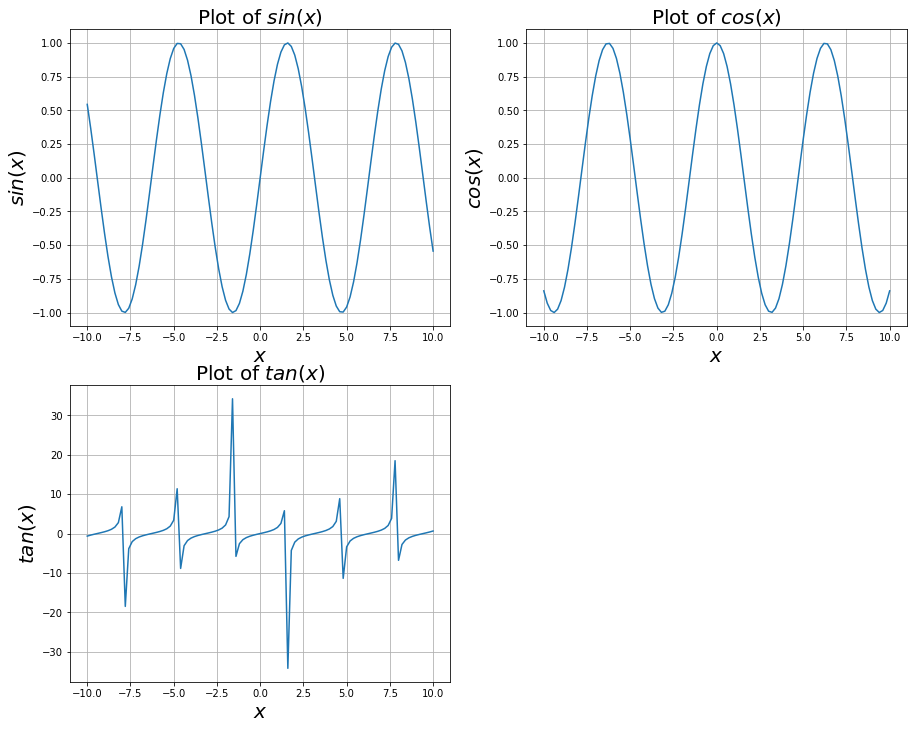

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (15, 12))

ax[0, 0].grid(True)
ax[0, 0].plot(x, np.sin(x))
ax[0, 0].set_title(r'Plot of $sin(x)$', fontsize = 20)
ax[0, 0].set_ylabel(r'$sin(x)$', fontsize = 20)
ax[0, 0].set_xlabel(r'$x$', fontsize = 20)

ax[0, 1].grid(True)
ax[0, 1].plot(x, np.cos(x))
ax[0, 1].set_title(r'Plot of $cos(x)$', fontsize = 20)
ax[0, 1].set_ylabel(r'$cos(x)$', fontsize = 20)
ax[0, 1].set_xlabel(r'$x$', fontsize = 20)

ax[1, 0].grid(True)
ax[1, 0].plot(x, np.tan(x))
ax[1, 0].set_title(r'Plot of $tan(x)$', fontsize = 20)
ax[1, 0].set_ylabel(r'$tan(x)$', fontsize = 20)
ax[1, 0].set_xlabel(r'$x$', fontsize = 20)

ax[1, 1].axis('off')
plt.show()

The following code block uses `suptitle()` method of our `fig` object to set a title for the figure object.

[Back to Table of Contents](#Table_of_Contents)<br>

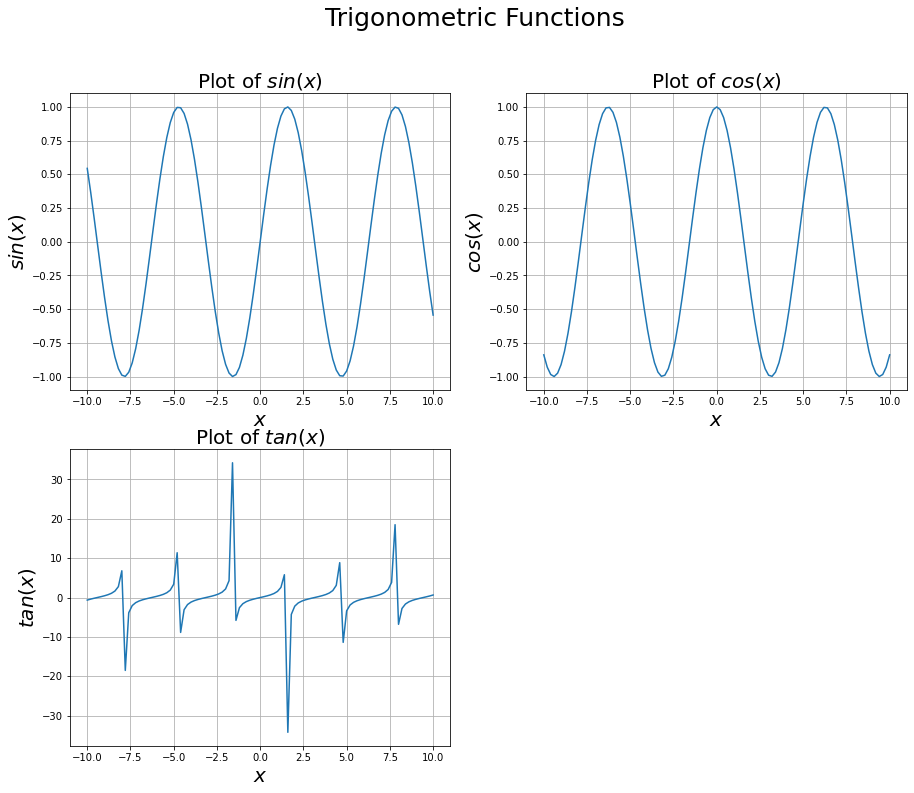

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (15, 12))

ax[0, 0].grid(True)
ax[0, 0].plot(x, np.sin(x))
ax[0, 0].set_title(r'Plot of $sin(x)$', fontsize = 20)
ax[0, 0].set_ylabel(r'$sin(x)$', fontsize = 20)
ax[0, 0].set_xlabel(r'$x$', fontsize = 20)

ax[0, 1].grid(True)
ax[0, 1].plot(x, np.cos(x))
ax[0, 1].set_title(r'Plot of $cos(x)$', fontsize = 20)
ax[0, 1].set_ylabel(r'$cos(x)$', fontsize = 20)
ax[0, 1].set_xlabel(r'$x$', fontsize = 20)

ax[1, 0].grid(True)
ax[1, 0].plot(x, np.tan(x))
ax[1, 0].set_title(r'Plot of $tan(x)$', fontsize = 20)
ax[1, 0].set_ylabel(r'$tan(x)$', fontsize = 20)
ax[1, 0].set_xlabel(r'$x$', fontsize = 20)

ax[1, 1].axis('off')

fig.suptitle('Trigonometric Functions', fontsize = 25)
plt.show()

Let's supose that instead of using multiple subplots, we desired to plot all of the trigonometric function in a single plot. The following code block shows that we can add multiple plots, one at a time, via multiple calls to the `plot()` method of our `ax` object.

[Back to Table of Contents](#Table_of_Contents)<br>

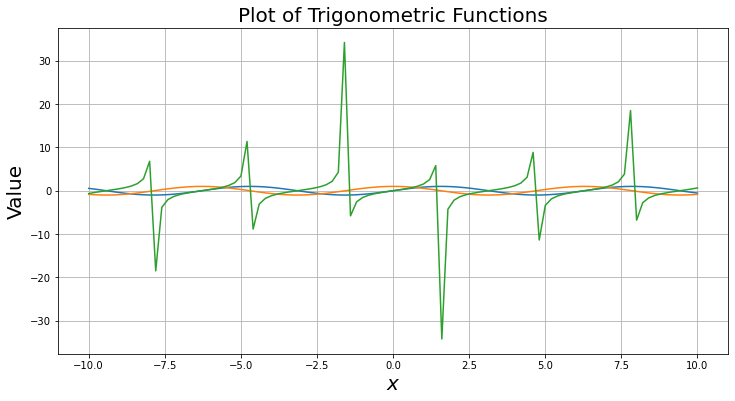

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.grid(True)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))
ax.plot(x, np.tan(x))
ax.set_title(r'Plot of Trigonometric Functions', fontsize = 20)
ax.set_ylabel(r'Value', fontsize = 20)
ax.set_xlabel(r'$x$', fontsize = 20)

plt.show()

To help us determine what each line represents, we can add *labels* and then use the `legend()` method of our `ax` object to display a legend.

[Back to Table of Contents](#Table_of_Contents)<br>

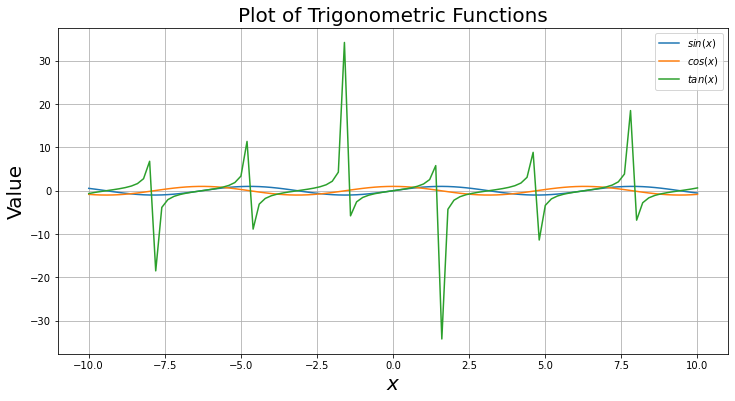

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.grid(True)
ax.plot(x, np.sin(x), label = r'$sin(x)$')
ax.plot(x, np.cos(x), label = r'$cos(x)$')
ax.plot(x, np.tan(x), label = r'$tan(x)$')
ax.set_title(r'Plot of Trigonometric Functions', fontsize = 20)
ax.set_ylabel(r'Value', fontsize = 20)
ax.set_xlabel(r'$x$', fontsize = 20)
ax.legend()

plt.show()

Although the legend is helpful, we can make it easier to differentiate between the plots by using diferent linestyles and colors for each function as shown in the following code block.

[Back to Table of Contents](#Table_of_Contents)<br>

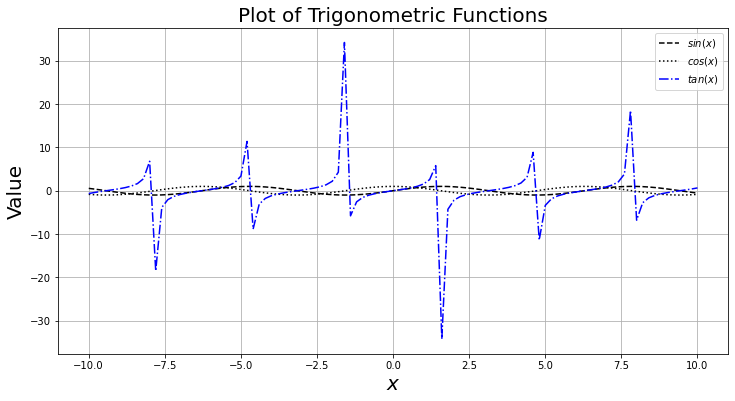

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.grid(True)
ax.plot(x, np.sin(x), label = r'$sin(x)$', linestyle = '--', color = 'k')
ax.plot(x, np.cos(x), label = r'$cos(x)$', linestyle = ':', color = 'k')
ax.plot(x, np.tan(x), label = r'$tan(x)$', linestyle = '-.', color = 'b')
ax.set_title(r'Plot of Trigonometric Functions', fontsize = 20)
ax.set_ylabel(r'Value', fontsize = 20)
ax.set_xlabel(r'$x$', fontsize = 20)
ax.legend()

plt.show()

In this section, we have demonstrated a simple framework for creating figures that are composed of multiple subplots using `matplotlib.pyplot`'s object-oriented interface. We will now look at how to create different plot types.

## Scatter Plots
<a id="scatter_plots"> </a>

In this section, we will look at how to create scatter plots. The following code block generates a random sample of 50 data points that exhibit a linear relationship bewteen *x* and *y* variables, with some uniformly distributed error.

[Back to Table of Contents](#Table_of_Contents)<br>

In [22]:
size = 50
m = 1
b = 10
e = 4
x = 10*np.random.rand(size)
y = m*x + b + (2*e)*np.random.rand(size)-e

The following code block uses the framework we saw in the previous section to construct a figure that is somposed of a single scatter plot for the data. Note that instead of use the `plot()` method of the `ax` object, we are now using the `scatter()` method to construct the scatter plot.

[Back to Table of Contents](#Table_of_Contents)<br>

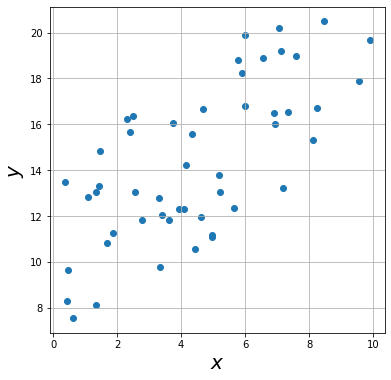

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.grid(True)
ax.scatter(x, y)
ax.set_ylabel(r'$y$', fontsize = 20)
ax.set_xlabel(r'$x$', fontsize = 20)

plt.show()

Let's now consider a case were we have two different groups of data that we wish to plot on a single subplot. The following code block generates such data.

[Back to Table of Contents](#Table_of_Contents)<br>

In [24]:
size = 50
m1 = 1
b1 = 10
e1 = 4
x1 = 10*np.random.rand(size)
y1 = m1*x1 + b1 + (2*e1)*np.random.rand(size)-e1


m2 = -1
b2 = 20
e2 = 1
x2 = 10*np.random.rand(size)
y2 = m2*x2 + b2 + (2*e2)*np.random.rand(size)-e2

The following code block plots the two sets of data and defines a different marker style for one to help us differentiate.

[Back to Table of Contents](#Table_of_Contents)<br>

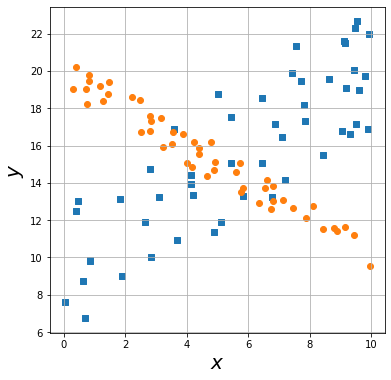

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.grid(True)
ax.scatter(x1, y1, marker = 's')
ax.scatter(x2, y2)
ax.set_ylabel(r'$y$', fontsize = 20)
ax.set_xlabel(r'$x$', fontsize = 20)

plt.show()

## Histograms
<a id="histograms"> </a>

Histograms are very useful in data analysis because they provide us with a means to visualize the distribution of an underlying data set. In particular, a histogram bins the sample space, or support, of a data set into bins, and plots the frequency that values occur in each one of the bins. We will demonstrate the constrction of histograms with `matplotlib` using a random sample drawn from a lognormal distribution. The following code block uses Numpy's `random` module to generate the sample. 

[Back to Table of Contents](#Table_of_Contents)<br>

In [26]:
size = 100000
np.random.seed(42)
ln_sample = np.random.lognormal(mean = 0.5, sigma= 0.25, size = size)

Again, using the previously define framework, the following code block uses the `hist()` method of the `ax` object to plot a histogram for the sample.

[Back to Table of Contents](#Table_of_Contents)<br>

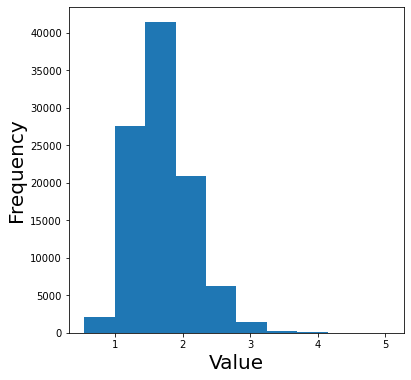

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.hist(ln_sample)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_xlabel('Value', fontsize = 20)

plt.show()

In the following code block, we use the `edgecolor` argument to add a black border around the histogram bins.

[Back to Table of Contents](#Table_of_Contents)<br>

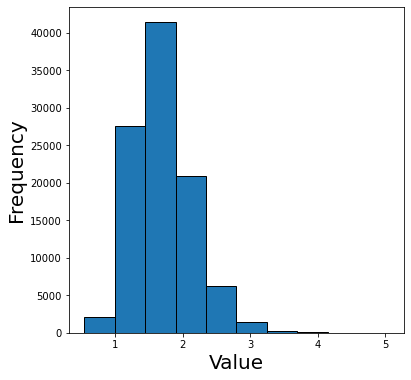

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.hist(ln_sample, edgecolor = 'k')
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_xlabel('Value', fontsize = 20)

plt.show()

A triangular distribution is a distribution that is commonly used in simulation experiments to approximate the distribution for a random variable. The distribution requires three estimates: 1) a minimum value, 2) a maximum value, and 3) a *most likely* value.

Suppose that we are interested in how well a triangular distribution will approximate our data. The following code block generates a random sample from a triangular distribution, where the minimum, maximum, and median values of our lognormal sample are used to specify the previously described parameters for the distribution.

[Back to Table of Contents](#Table_of_Contents)<br>

In [29]:
median_val = np.percentile(ln_sample, 50)
min_val = ln_sample.min()
max_val = ln_sample.max()
tri_sample = np.random.triangular(min_val, median_val, max_val, size)

The following code block plots the two random samples.

[Back to Table of Contents](#Table_of_Contents)<br>

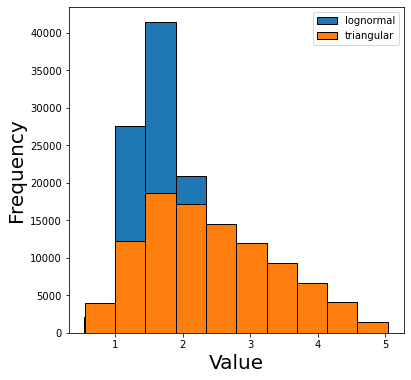

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.hist(ln_sample, edgecolor = 'k', label = 'lognormal')
ax.hist(tri_sample, edgecolor = 'k', label = 'triangular')
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_xlabel('Value', fontsize = 20)
ax.legend()

plt.show()

In the previous code block, it is difficult to see the differences because the histogram for the triangular distribution sample *covers up* that for the lognormal sample. We can use the `alpha` argument to make the plot for the triangular sample mre transparent, allowing us to see the diferences more clearly.

[Back to Table of Contents](#Table_of_Contents)<br>

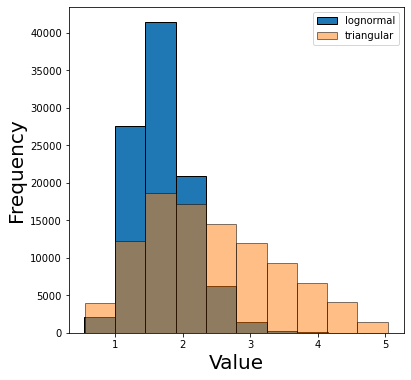

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.hist(ln_sample, edgecolor = 'k', label = 'lognormal')
ax.hist(tri_sample, edgecolor = 'k', alpha = 0.5, label = 'triangular')
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_xlabel('Value', fontsize = 20)
ax.legend()

plt.show()

By default, the `hist()` method will determine a reasonable number of bins to use for the provided data. However, a number of bins, or even specific bin edges, may be specifed as an optional argument. The following code block shows how a user-specifiednumber of bins can be provided. Note that changing the number of bins results in very different *pictures* for the underlying data (compare 3 bins to 100 bins).

[Back to Table of Contents](#Table_of_Contents)<br>

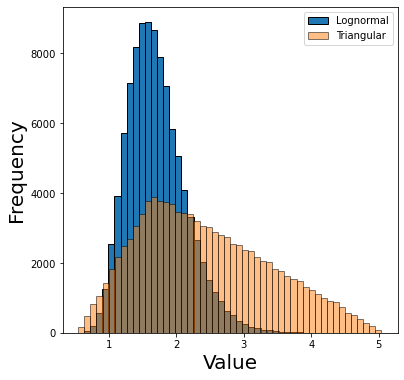

In [32]:
num_bins = 50

fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.hist(ln_sample, edgecolor = 'k', label = 'Lognormal', bins = num_bins)
ax.hist(tri_sample, edgecolor = 'k', alpha = 0.5, label = 'Triangular', bins = num_bins)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_xlabel('Value', fontsize = 20)
ax.legend()

plt.show()

# Contour Plots
<a id="contour_plots"> </a>

From https://www.itl.nist.gov/div898/handbook/eda/section3/contour.htm (accessed 12/29/2018):

> "A contour plot is a graphical technique for representing a 3-dimensional surface by plotting constant z slices, called contours, on a 2-dimensional format. That is, given a value for z, lines are drawn for connecting the (x,y) coordinates where that z value occurs."

Contour plots can be very useful for visulizing interactions that are present in data. The following code block defines a function for a complex trigonometric expression. This function is applied to $x$ and $y$ values ranging from zero to five.

[Back to Table of Contents](#Table_of_Contents)<br>

In [ ]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Again, using our plotting framework, this time with our `ax` object's `contour` method, we plot our generated data.

[Back to Table of Contents](#Table_of_Contents)<br>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.contour(X, Y, Z, colors='black')
ax.set_ylabel('Y', fontsize = 20)
ax.set_xlabel('X', fontsize = 20)

plt.show()

The previous plot is not extremely useful because we do not understand the values that correspond to the various contours. Using the `countourf()` method instead allows us to generate filled contours that we may map to colorbar. This approach provides us with a better sense of how the function behaves as can be seen in the following code block.

[Back to Table of Contents](#Table_of_Contents)<br>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))


contour_colors = ax.contourf(X, Y, Z, 20, cmap='RdGy')
fig.colorbar(contour_colors)
ax.set_ylabel('Y', fontsize = 20)
ax.set_xlabel('X', fontsize = 20)

plt.show()

Using the `countour()` and `contourf` methods together allows us to include labels along with the colorbar.

[Back to Table of Contents](#Table_of_Contents)<br>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))


contour_colors = ax.contourf(X, Y, Z, 20, cmap='coolwarm')
contours = ax.contour(X, Y, Z, 5, colors='black')
fig.colorbar(contour_colors)
contours.clabel()
ax.set_ylabel(r'$Y$', fontsize = 20, rotation = 0, labelpad=20)
ax.set_xlabel(r'$X$', fontsize = 20)

plt.show()

This has been a very high-level introduction to the `matplotlib` package. The package includes much more functionality than we describe, but my hope is that you now have a better sense of how the package works and understand the simple framework that can be expanded to create increasingly complex visualizations. In addition to `matplotlib`, there are other plotting packages available in Python including `Bokeh` and `Seaborn`.

[Back to Table of Contents](#Table_of_Contents)<br>